# Effects of Wear on Body Armour

## Importing Data 

Published data by the National Institute of Justic and National Research Council of Canada was used. Attempts to automatically extract tables using various Python libraries were not that successful. Hence, information was manually keyed into a separate excel sheet. 

In [ ]:
## Import data from excel

## Data extracted from the "Ballistic Tests of Used Soft Body Armor" research by the NIJ and NRCC

import pandas as pd
import numpy as np

df1 = pd.read_excel('BallisticTestsofUsedSoftBodyArmor.xlsx','v50 limit')
df2 = pd.read_excel('BallisticTestsofUsedSoftBodyArmor.xlsx','v50 raw test data')
df3 = pd.read_excel('BallisticTestsofUsedSoftBodyArmor.xlsx','Deformation')
df4 = pd.read_excel('BallisticTestsofUsedSoftBodyArmor.xlsx','Complete Ballistic Data')

To help with subsequent analysis, the data was divided based on the extent of penetration by the projectile (partial or complete), and further split based on the impact face (front or back)

In [2]:
## Extract data for PP cases. Focus is on effects of wet/dry and wear on velocity
df2_PP = df2[['Sample','PP average vel (ft/s)','Wet/Dry','Wear','Used for v50 calculations','Caliber']]
df2_PP.dropna(axis = 0, inplace = True)
df2_PP = df2_PP.drop('Used for v50 calculations', axis = 1)

## to split the data into front and back
df2_PP_F = df2_PP[df2_PP['Sample'].str.contains('F')]
df2_PP_B = df2_PP[df2_PP['Sample'].str.contains('B')]

## Do the same for CP
df2_CP = df2[['Sample','CP (ft/s)','Wet/Dry','Wear','Used for v50 calculations','Caliber']]
df2_CP.dropna(axis = 0, inplace = True)
df2_CP = df2_CP.drop('Used for v50 calculations', axis = 1)
df2_CP_F = df2_CP[df2_CP['Sample'].str.contains('F')]
df2_CP_B = df2_CP[df2_CP['Sample'].str.contains('B')]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


The original data categorised the extent of wear into "Unused", "Light", "Moderate", and "Heavy". To facilitate subsequent analysis, these categorical variables had to be converted into integer data. 

In [3]:
## Convert categorical variables to integers to enable subsequent plotting and/or analysis

## Since Wet/Dry isn't ordinal, use onehot method to convert
test_onehot = pd.get_dummies(df2_PP_F['Wet/Dry'])

## Assuming that Unused > Light > Moderate > Heavy use, number there in order, from 1 to 4
temp = df2_PP_F['Wear']

for index, row in df2_PP_F.iterrows():
    if row['Wear'] == 'Unused':
        df2_PP_F.loc[index,'Wear'] = 1
    elif row['Wear'] == 'Light':
        df2_PP_F.loc[index,'Wear'] = 2
    elif row['Wear'] == 'Moderate':
        df2_PP_F.loc[index,'Wear'] = 3
    else:
        df2_PP_F.loc[index,'Wear'] = 4      

df2_PP_F = pd.concat([df2_PP_F, test_onehot],axis = 1).drop(['Sample','Wet/Dry'], axis = 1).reset_index(drop = True)
df2_PP_F['Wear'] = pd.to_numeric(df2_PP_F['Wear'])

test_onehot = pd.get_dummies(df2_CP_F['Wet/Dry'])

for index, row in df2_CP_F.iterrows():
    if row['Wear'] == 'Unused':
        df2_CP_F.loc[index,'Wear'] = 1
    elif row['Wear'] == 'Light':
        df2_CP_F.loc[index,'Wear'] = 2
    elif row['Wear'] == 'Moderate':
        df2_CP_F.loc[index,'Wear'] = 3
    else:
        df2_CP_F.loc[index,'Wear'] = 4  
        
df2_CP_F = pd.concat([df2_CP_F, test_onehot],axis = 1).drop(['Sample','Wet/Dry'], axis = 1).reset_index(drop = True)
df2_CP_F['Wear']=pd.to_numeric(df2_CP_F['Wear'])

test_onehot = pd.get_dummies(df2_PP_B['Wet/Dry'])

for index, row in df2_PP_B.iterrows():
    if row['Wear'] == 'Unused':
        df2_PP_B.loc[index,'Wear'] = 1
    elif row['Wear'] == 'Light':
        df2_PP_B.loc[index,'Wear'] = 2
    elif row['Wear'] == 'Moderate':
        df2_PP_B.loc[index,'Wear'] = 3
    else:
        df2_PP_B.loc[index,'Wear'] = 4  
        
df2_PP_B = pd.concat([df2_PP_B, test_onehot],axis = 1).drop(['Sample','Wet/Dry'], axis = 1).reset_index(drop = True)
df2_PP_B['Wear']=pd.to_numeric(df2_PP_B['Wear'])

test_onehot = pd.get_dummies(df2_CP_B['Wet/Dry'])

for index, row in df2_CP_B.iterrows():
    if row['Wear'] == 'Unused':
        df2_CP_B.loc[index,'Wear'] = 1
    elif row['Wear'] == 'Light':
        df2_CP_B.loc[index,'Wear'] = 2
    elif row['Wear'] == 'Moderate':
        df2_CP_B.loc[index,'Wear'] = 3
    else:
        df2_CP_B.loc[index,'Wear'] = 4  
        
df2_CP_B = pd.concat([df2_CP_B, test_onehot],axis = 1).drop(['Sample','Wet/Dry'], axis = 1).reset_index(drop = True)
df2_CP_B['Wear']=pd.to_numeric(df2_CP_B['Wear'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


The results were further divided so as to examine the effects of the bullet's calibre

In [4]:
## split 22 and 38 cal

df2_PP_F_22 = df2_PP_F[df2_PP_F['Caliber'] == 22]
df2_PP_B_22 = df2_PP_B[df2_PP_B['Caliber'] == 22]
df2_CP_F_22 = df2_CP_F[df2_CP_F['Caliber'] == 22]
df2_CP_B_22 = df2_CP_B[df2_CP_B['Caliber'] == 22]

df2_PP_F_38 = df2_PP_F[df2_PP_F['Caliber'] == 38]
df2_PP_B_38 = df2_PP_B[df2_PP_B['Caliber'] == 38]
df2_CP_F_38 = df2_CP_F[df2_CP_F['Caliber'] == 38]
df2_CP_B_38 = df2_CP_B[df2_CP_B['Caliber'] == 38]

## Visualisation

First create the X and Y variables, with the extent of wear and wet/dry condition as the X variables and velocity related data as the Y variables. 

In [5]:
## Create x and y variables. Y will contain velocity related columns

## for 22 cal
df2_PP_F_22_y = df2_PP_F_22['PP average vel (ft/s)']
df2_PP_F_22_x = df2_PP_F_22.drop(columns = ['PP average vel (ft/s)','Dry','Caliber'], axis = 1)

df2_PP_B_22_y = df2_PP_B_22['PP average vel (ft/s)']
df2_PP_B_22_x = df2_PP_B_22.drop(columns = ['PP average vel (ft/s)','Dry','Caliber'], axis = 1)

df2_CP_F_22_y = df2_CP_F_22['CP (ft/s)']
df2_CP_F_22_x = df2_CP_F_22.drop(columns = ['CP (ft/s)','Dry','Caliber'], axis = 1)

df2_CP_B_22_y = df2_CP_B_22['CP (ft/s)']
df2_CP_B_22_x = df2_CP_B_22.drop(columns = ['CP (ft/s)','Dry','Caliber'], axis = 1)

## for 38 cal
df2_PP_F_38_y = df2_PP_F_38['PP average vel (ft/s)']
df2_PP_F_38_x = df2_PP_F_38.drop(columns = ['PP average vel (ft/s)','Dry','Caliber'], axis = 1)

df2_PP_B_22_y = df2_PP_B_38['PP average vel (ft/s)']
df2_PP_B_22_x = df2_PP_B_38.drop(columns = ['PP average vel (ft/s)','Dry','Caliber'], axis = 1)

df2_CP_F_38_y = df2_CP_F_38['CP (ft/s)']
df2_CP_F_38_x = df2_CP_F_38.drop(columns = ['CP (ft/s)','Dry','Caliber'], axis = 1)

df2_CP_B_38_y = df2_CP_B_38['CP (ft/s)']
df2_CP_B_38_x = df2_CP_B_38.drop(columns = ['CP (ft/s)','Dry','Caliber'], axis = 1)

As a first check, a correlation heatmap was generated between the velocity and the two features. 

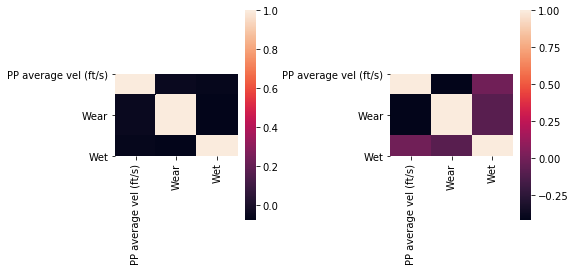

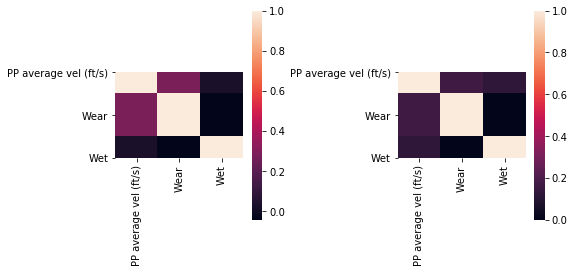

In [6]:
## Visualise correlation between velocity and the two features (wear and wet/dry) [for PP]. From the plots, does not appear to have strong correlation with either.
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

## for 22 caliber

plt.figure(1,figsize=plt.figaspect(0.5))
plt.subplot(1,2,1, aspect = 'equal')
corr1 = df2_PP_F_22.drop(['Dry','Caliber'],axis = 1).corr()
sns.heatmap(corr1)

plt.subplot(1,2,2, aspect = 'equal')
corr2 = df2_PP_B_22.drop(['Dry','Caliber'],axis = 1).corr()
sns.heatmap(corr2)

plt.tight_layout()

print("\n")

## for 38 caliber
plt.figure(2,figsize=plt.figaspect(0.5))
plt.subplot(1,2,1, aspect = 'equal')
corr3 = df2_PP_F_38.drop(['Dry','Caliber'],axis = 1).corr()
sns.heatmap(corr3)

plt.subplot(1,2,2, aspect = 'equal')
corr4 = df2_PP_B_38.drop(['Dry','Caliber'],axis = 1).corr()
sns.heatmap(corr4)

plt.tight_layout()

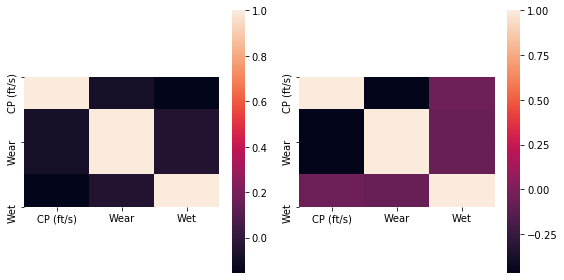

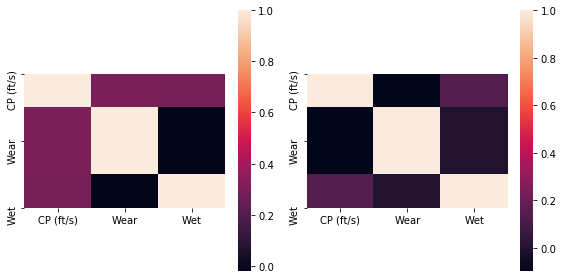

In [7]:
## Visualise correlation between velocity and the two features (wear and wet/dry) [for CP]. From the plots, does not appear to have strong correlation with either

## for 22 cal

plt.figure(3,figsize=plt.figaspect(0.5))
plt.subplot(1,2,1, aspect = 'equal')
corr5 = df2_CP_F_22.drop(['Dry','Caliber'],axis = 1).corr()
sns.heatmap(corr5)

plt.subplot(1,2,2, aspect = 'equal')
corr6 = df2_CP_B_22.drop(['Dry','Caliber'],axis = 1).corr()
sns.heatmap(corr6)

plt.tight_layout()

plt.figure(4,figsize=plt.figaspect(0.5))
plt.subplot(1,2,1, aspect = 'equal')
corr7 = df2_CP_F_38.drop(['Dry','Caliber'],axis = 1).corr()
sns.heatmap(corr7)

plt.subplot(1,2,2, aspect = 'equal')
corr8 = df2_CP_B_38.drop(['Dry','Caliber'],axis = 1).corr()
sns.heatmap(corr8)

plt.tight_layout()

In [8]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(3, figsize=plt.figaspect(0.5))
# ax = fig.add_subplot(1,2,1, projection = '3d')
# ax.scatter(df2_PP_F_x.iloc[:,0],df2_PP_F_x.iloc[:,1],df2_PP_F_y)

# ax2 = fig.add_subplot(1,2,2, projection = '3d')
# ax2.scatter(df2_CP_F_x.iloc[:,0],df2_CP_F_x.iloc[:,1],df2_CP_F_y)

# plt.tight_layout()

Boxplots were used to examine whether there were significant differences between wet and dry test cases

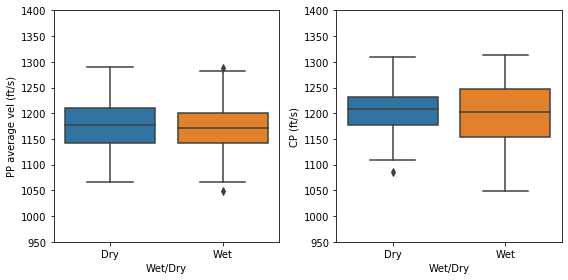

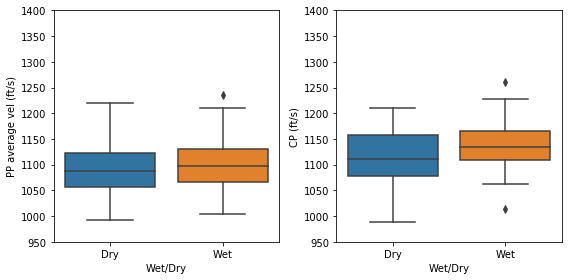

In [9]:
## Try visualising with boxplot to see if there's a significant difference between wet and dry test cases. Does not appear to exist for both CP and PP cases

Box_CP_22 = df2_CP[df2_CP['Caliber']==22]
Box_CP_38 = df2_CP[df2_CP['Caliber']==38]

Box_PP_22 = df2_PP[df2_PP['Caliber']==22]
Box_PP_38 = df2_PP[df2_PP['Caliber']==38]

## 22 cal

Box_CP_22 = Box_CP_22[['CP (ft/s)','Wet/Dry','Wear']]
Box_PP_22 = Box_PP_22[['PP average vel (ft/s)','Wet/Dry','Wear']]

fig5, ax5 = plt.subplots(1,2, figsize = plt.figaspect(0.5))

sns.boxplot(y = Box_PP_22['PP average vel (ft/s)'], x = Box_PP_22['Wet/Dry'], ax = ax5[0]).set_ylim([950,1400])
sns.boxplot(y = Box_CP_22['CP (ft/s)'], x = Box_CP_22['Wet/Dry'], ax = ax5[1]).set_ylim([950,1400])

plt.tight_layout()

print("\n\n\n\n")

## 38 cal

Box_CP_38 = Box_CP_38[['CP (ft/s)','Wet/Dry','Wear']]
Box_PP_38 = Box_PP_38[['PP average vel (ft/s)','Wet/Dry','Wear']]

fig6, ax6 = plt.subplots(1,2, figsize = plt.figaspect(0.5))

sns.boxplot(y = Box_PP_38['PP average vel (ft/s)'], x = Box_PP_38['Wet/Dry'], ax = ax6[0]).set_ylim([950,1400])
sns.boxplot(y = Box_CP_38['CP (ft/s)'], x = Box_CP_38['Wet/Dry'], ax = ax6[1]).set_ylim([950,1400])

plt.tight_layout()

The effects of wear were also examined using boxplots.

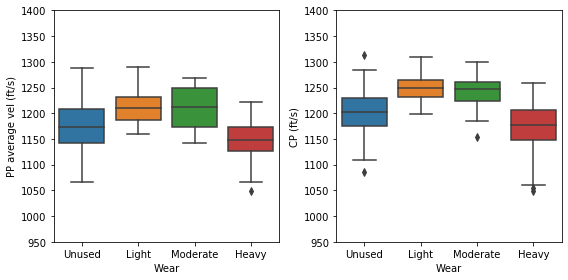

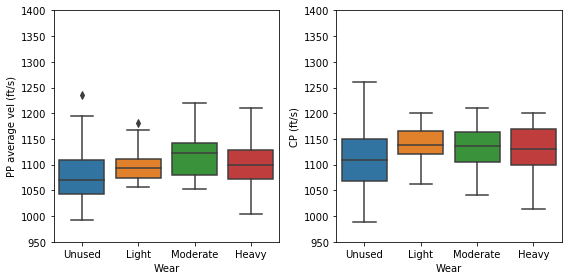

In [10]:
## There seems to be a trend of heavy wear affecting both PP and CP, but still lies within one quartile of the median. Potential area to delve deeper into it? Oddly, unused samples also seem to have lower PP/CP values

## 22 cal

fig7, ax7 = plt.subplots(1,2, figsize = plt.figaspect(0.5))

position = ['Unused','Light','Moderate','Heavy']

sns.boxplot(y = Box_PP_22['PP average vel (ft/s)'], x =  Box_PP_22['Wear'], ax = ax7[0], order = position).set_ylim([950,1400])
sns.boxplot(y = Box_CP_22['CP (ft/s)'], x = Box_CP_22['Wear'], ax = ax7[1], order = position).set_ylim([950,1400])

plt.tight_layout()

## 38 cal

fig8, ax8 = plt.subplots(1,2, figsize = plt.figaspect(0.5))

sns.boxplot(y = Box_PP_38['PP average vel (ft/s)'], x = Box_PP_38['Wear'], ax = ax8[0], order = position).set_ylim([950,1400])
sns.boxplot(y = Box_CP_38['CP (ft/s)'], x = Box_CP_38['Wear'], ax = ax8[1], order = position).set_ylim([950,1400])

plt.tight_layout()

In [11]:
## extract 22 cal info

PP_unused_22 = Box_PP_22[Box_PP_22['Wear'] == 'Unused']['PP average vel (ft/s)']
PP_light_22 = Box_PP_22[Box_PP_22['Wear'] == 'Light']['PP average vel (ft/s)']
PP_mod_22 = Box_PP_22[Box_PP_22['Wear'] == 'Moderate']['PP average vel (ft/s)']
PP_heavy_22 = Box_PP_22[Box_PP_22['Wear'] == 'Heavy']['PP average vel (ft/s)']
CP_unused_22 = Box_CP_22[Box_CP_22['Wear'] == 'Unused']['CP (ft/s)']
CP_light_22 = Box_CP_22[Box_CP_22['Wear'] == 'Light']['CP (ft/s)']
CP_mod_22 = Box_CP_22[Box_CP_22['Wear'] == 'Moderate']['CP (ft/s)']
CP_heavy_22 = Box_CP_22[Box_CP_22['Wear'] == 'Heavy']['CP (ft/s)']

## extract 38 cal info

PP_unused_38 = Box_PP_38[Box_PP_38['Wear'] == 'Unused']['PP average vel (ft/s)']
PP_light_38 = Box_PP_38[Box_PP_38['Wear'] == 'Light']['PP average vel (ft/s)']
PP_mod_38 = Box_PP_38[Box_PP_38['Wear'] == 'Moderate']['PP average vel (ft/s)']
PP_heavy_38 = Box_PP_38[Box_PP_38['Wear'] == 'Heavy']['PP average vel (ft/s)']
CP_unused_38 = Box_CP_38[Box_CP_38['Wear'] == 'Unused']['CP (ft/s)']
CP_light_38 = Box_CP_38[Box_CP_38['Wear'] == 'Light']['CP (ft/s)']
CP_mod_38 = Box_CP_38[Box_CP_38['Wear'] == 'Moderate']['CP (ft/s)']
CP_heavy_38 = Box_CP_38[Box_CP_38['Wear'] == 'Heavy']['CP (ft/s)']

In [12]:
# plt.hist(PP_unused, label = 'unused')
# plt.hist(PP_heavy, label = 'heavy')
# plt.hist(PP_mod, label = 'moderate')
# plt.legend(loc = 'best')

In [13]:
# plt.hist(CP_unused, label = 'unused')
# plt.hist(CP_heavy, label = 'heavy')
# plt.hist(CP_mod, label = 'moderate')
# plt.legend(loc = 'best')

## Analysis

Apply statistical tests (t-test) to check if velocities within each wear category were indeed significantly different

In [14]:
## Use t-test to check if velocities within each wear category are indeed different. For both CP and PP, difference there appears to be difference between moderate and heavy wear

## 22 cal
from scipy import stats
print('22cal: t test score between light and unused CP values: ' + stats.ttest_ind(CP_light_22,CP_unused_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_light_22,CP_unused_22).pvalue.astype(str))
print('22cal: t test score between moderate and unused CP values: ' + stats.ttest_ind(CP_mod_22,CP_unused_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_mod_22,CP_unused_22).pvalue.astype(str))
print('22cal: t test score between heavy and unused CP values: ' + stats.ttest_ind(CP_heavy_22,CP_unused_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_heavy_22,CP_unused_22).pvalue.astype(str))
print('22cal: t test score between light and moderate CP values: ' + stats.ttest_ind(CP_light_22,CP_mod_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_light_22,CP_mod_22).pvalue.astype(str))
print('22cal: t test score between light and heavy CP values: ' + stats.ttest_ind(CP_light_22,CP_heavy_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_light_22,CP_heavy_22).pvalue.astype(str))
print('22cal: t test score between moderate and heavy CP values: ' + stats.ttest_ind(CP_mod_22,CP_heavy_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_mod_22,CP_heavy_22).pvalue.astype(str))

## 38 cal
from scipy import stats
print('38cal: t test score between light and unused CP values: ' + stats.ttest_ind(CP_light_38,CP_unused_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_light_38,CP_unused_38).pvalue.astype(str))
print('38cal: t test score between moderate and unused CP values: ' + stats.ttest_ind(CP_mod_38,CP_unused_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_mod_38,CP_unused_38).pvalue.astype(str))
print('38cal: t test score between heavy and unused CP values: ' + stats.ttest_ind(CP_heavy_38,CP_unused_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_heavy_38,CP_unused_38).pvalue.astype(str))
print('38cal: t test score between light and moderate CP values: ' + stats.ttest_ind(CP_light_38,CP_mod_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_light_38,CP_mod_38).pvalue.astype(str))
print('38cal: t test score between light and heavy CP values: ' + stats.ttest_ind(CP_light_38,CP_heavy_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_light_38,CP_heavy_38).pvalue.astype(str))
print('38cal: t test score between moderate and heavy CP values: ' + stats.ttest_ind(CP_mod_38,CP_heavy_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_mod_38,CP_heavy_38).pvalue.astype(str))


22cal: t test score between light and unused CP values: 4.628314952952042, with a p-value of 1.6776853743997112e-05
22cal: t test score between moderate and unused CP values: 3.3012866642566303, with a p-value of 0.001517059507602925
22cal: t test score between heavy and unused CP values: -3.476099248989602, with a p-value of 0.0007362313705980899
22cal: t test score between light and moderate CP values: 1.3272667014879374, with a p-value of 0.192138443449568
22cal: t test score between light and heavy CP values: 6.871379840573956, with a p-value of 1.5325946017045295e-09
22cal: t test score between moderate and heavy CP values: 5.686168261851595, with a p-value of 2.2265685417322547e-07
38cal: t test score between light and unused CP values: 1.7157555772475375, with a p-value of 0.09154460367908442
38cal: t test score between moderate and unused CP values: 1.4880586905432316, with a p-value of 0.14215253491906255
38cal: t test score between heavy and unused CP values: 1.13295772549812

In [15]:
## 22 cal
print('22 cal: t test score between light and unused PP values: ' + stats.ttest_ind(PP_light_22,PP_unused_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_light_22,PP_unused_22).pvalue.astype(str))
print('22 cal: t test score between moderate and unused PP values: ' + stats.ttest_ind(PP_mod_22,PP_unused_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_mod_22,PP_unused_22).pvalue.astype(str))
print('22 cal: t test score between heavy and unused PP values: ' + stats.ttest_ind(PP_heavy_22,PP_unused_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_heavy_22,PP_unused_22).pvalue.astype(str))
print('22 cal: t test score between light and moderate PP values: ' + stats.ttest_ind(PP_mod_22,PP_light_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_mod_22,PP_light_22).pvalue.astype(str))
print('22 cal: t test score between light and heavy PP values: ' + stats.ttest_ind(PP_light_22,PP_heavy_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_light_22,PP_heavy_22).pvalue.astype(str))
print('22 cal: t test score between moderate and heavy PP values: ' + stats.ttest_ind(PP_mod_22,PP_heavy_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_mod_22,PP_heavy_22).pvalue.astype(str))

## 38 cal
print('38 cal: t test score between light and unused PP values: ' + stats.ttest_ind(PP_light_38,PP_unused_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_light_38,PP_unused_38).pvalue.astype(str))
print('38 cal: t test score between moderate and unused PP values: ' + stats.ttest_ind(PP_mod_38,PP_unused_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_mod_38,PP_unused_38).pvalue.astype(str))
print('38 cal: t test score between heavy and unused PP values: ' + stats.ttest_ind(PP_heavy_38,PP_unused_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_heavy_38,PP_unused_38).pvalue.astype(str))
print('38 cal: t test score between light and moderate PP values: ' + stats.ttest_ind(PP_mod_38,PP_light_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_mod_38,PP_light_38).pvalue.astype(str))
print('38 cal: t test score between light and heavy PP values: ' + stats.ttest_ind(PP_light_38,PP_heavy_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_light_38,PP_heavy_38).pvalue.astype(str))
print('38 cal: t test score between moderate and heavy PP values: ' + stats.ttest_ind(PP_mod_38,PP_heavy_38).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(PP_mod_38,PP_heavy_38).pvalue.astype(str))


22 cal: t test score between light and unused PP values: 3.1125964042866756, with a p-value of 0.0027120226067881637
22 cal: t test score between moderate and unused PP values: 2.6048639070444684, with a p-value of 0.01134549928749282
22 cal: t test score between heavy and unused PP values: -2.7595307449965323, with a p-value of 0.006852247192017041
22 cal: t test score between light and moderate PP values: -0.33253453676340444, with a p-value of 0.7412221573850055
22 cal: t test score between light and heavy PP values: 6.684009303349074, with a p-value of 3.275954475783365e-09
22 cal: t test score between moderate and heavy PP values: 5.770072670086825, with a p-value of 1.6762773628109553e-07
38 cal: t test score between light and unused PP values: 1.5693384161600288, with a p-value of 0.12200912237287286
38 cal: t test score between moderate and unused PP values: 2.873808952446328, with a p-value of 0.0056592863300223535
38 cal: t test score between heavy and unused PP values: 1.933

In [16]:
## Is there a significant difference between front vs back? Use CP for 22 cal to check

CP_mod_F_22 = df2_CP_F_22[df2_CP_F_22['Wear'] == 3]['CP (ft/s)']
CP_mod_B_22 = df2_CP_B_22[df2_CP_B_22['Wear'] == 3]['CP (ft/s)']

CP_heavy_F_22 = df2_CP_F_22[df2_CP_F_22['Wear'] == 4]['CP (ft/s)']
CP_heavy_B_22 = df2_CP_B_22[df2_CP_B_22['Wear'] == 4]['CP (ft/s)']

In [17]:
# plt.subplot(1,2,1)
# plt.hist(CP_mod_F_22, label = 'moderate, front')
# plt.hist(CP_mod_B_22, label = 'moderate,back')
# plt.legend(loc = 'best')

# plt.subplot(1,2,2)
# plt.hist(CP_heavy_F_22, label = 'heavy, front')
# plt.hist(CP_heavy_B_22, label = 'heavy,back')
# plt.legend(loc = 'best')

In [18]:
print('t test score between moderate front and moderate back CP values: ' + stats.ttest_ind(CP_mod_F_22,CP_mod_B_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_mod_F_22,CP_mod_B_22).pvalue.astype(str))
print('t test score between heavy front and heavy back CP values: ' + stats.ttest_ind(CP_heavy_F_22,CP_heavy_B_22).statistic.astype(str) + ', with a p-value of ' + stats.ttest_ind(CP_heavy_F_22,CP_heavy_B_22).pvalue.astype(str))

## there appears to be some difference between front and back. Hence, don't merge

t test score between moderate front and moderate back CP values: -0.7980374675660492, with a p-value of 0.4347103610903553
t test score between heavy front and heavy back CP values: 1.3686021091523353, with a p-value of 0.17658923122499756


## Regression

The data was further analysed by attempting to fit regression models to the data and examining the goodness of fit.

-0.0015285856499671624


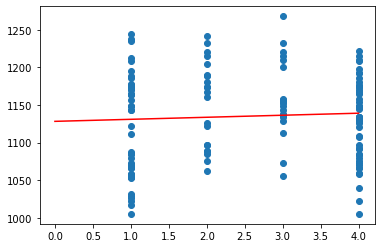

In [19]:
## Test out some learning algorithms between velocities and wear using 22 cal (both front/back)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

PP_22_x = df2_PP_F_22_x['Wear']
PP_22_x = PP_22_x.append(df2_PP_B_22_x['Wear'])
PP_22_y = df2_PP_F_22_y
PP_22_y = PP_22_y.append(df2_PP_B_22_y)
X1_train, X1_test, y1_train, y1_test = train_test_split(pd.DataFrame(PP_22_x), PP_22_y)
lin_reg = LinearRegression().fit(X1_train, y1_train)
print(lin_reg.score(X1_test,y1_test))

x_test = pd.DataFrame(np.linspace(0,4,10))

y_pred = lin_reg.predict(x_test)

plt.scatter(PP_22_x,PP_22_y)
plt.plot(x_test,y_pred,'red')

-0.15717022679660864


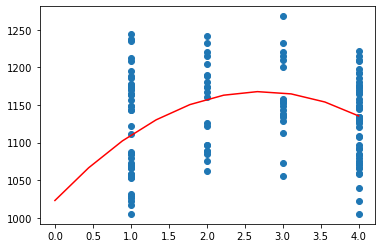

In [20]:
poly = PolynomialFeatures(degree = 2)
X_PP_22_poly = poly.fit_transform(pd.DataFrame(PP_22_x))

X1_train, X1_test, y1_train, y1_test = train_test_split(X_PP_22_poly, PP_22_y)

lin_reg2 = LinearRegression() 
poly1 = lin_reg2.fit(X1_train, y1_train)
print(lin_reg2.score(X1_test,y1_test))

y_poly1_pred = poly1.predict(poly.fit_transform(x_test))

plt.scatter(PP_22_x,PP_22_y)
plt.plot(x_test,y_poly1_pred,'red')

0.11898395373510928


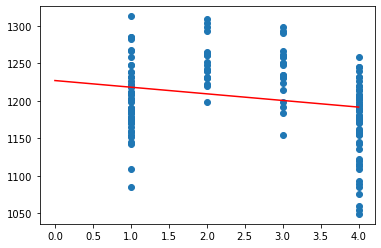

In [22]:
## Test out some learning algorithms between velocities and wear using 22 cal (both front/back)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

CP_22_x = df2_CP_F_22_x['Wear']
CP_22_x = CP_22_x.append(df2_CP_B_22_x['Wear'])
CP_22_y = df2_CP_F_22_y
CP_22_y = CP_22_y.append(df2_CP_B_22_y)
X1_train3, X1_test3, y1_train3, y1_test3 = train_test_split(pd.DataFrame(CP_22_x), CP_22_y)
lin_reg3 = LinearRegression().fit(X1_train3, y1_train3)
print(lin_reg3.score(X1_test3,y1_test3))

x_test = pd.DataFrame(np.linspace(0,4,10))

y_pred = lin_reg3.predict(x_test)

plt.scatter(CP_22_x,CP_22_y)
plt.plot(x_test,y_pred,'red')

0.24464287109906072


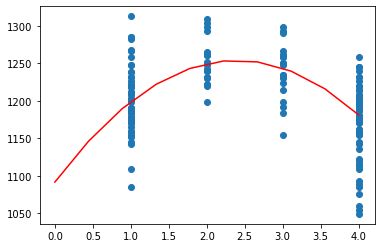

In [23]:
poly = PolynomialFeatures(degree = 2)
X_CP_22_poly = poly.fit_transform(pd.DataFrame(CP_22_x))

X1_train4, X1_test4, y1_train4, y1_test4 = train_test_split(X_CP_22_poly, CP_22_y)

lin_reg4 = LinearRegression() 
poly2 = lin_reg4.fit(X1_train4, y1_train4)
print(lin_reg4.score(X1_test4,y1_test4))

y_poly1_pred = poly2.predict(poly.fit_transform(x_test))

plt.scatter(CP_22_x,CP_22_y)
plt.plot(x_test,y_poly1_pred,'red')

0.030303030303030304


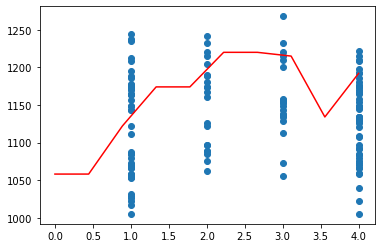

In [24]:
from sklearn.naive_bayes import GaussianNB

X1_train, X1_test, y1_train, y1_test = train_test_split(pd.DataFrame(PP_22_x), PP_22_y)

nbclf = GaussianNB().fit(X1_train,y1_train)
print(nbclf.score(X1_test,y1_test))

y_nbclf_pred = nbclf.predict(x_test)

plt.scatter(PP_22_x,PP_22_y)
plt.plot(x_test,y_nbclf_pred,'red')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X1_train, X1_test, y1_train, y1_test = train_test_split(pd.DataFrame(PP_22_x), PP_22_y)

GBclf = GradientBoostingClassifier()
# GBclf = GradientBoostingClassifier().fit(X1_train,y1_train)

# print(GBclf.score(X1_test,y1_test))

param_val = {'n_estimators':[50,100,1000],'learning_rate':[0.01,0.1,1],'max_depth':[2,3,5]}
grid_GB_clf = GridSearchCV(GBclf, param_grid = param_val)
grid_GB_clf.fit(X1_train,y1_train)
print(grid_GB_clf.best_score_)

y_gbclf_pred = grid_GB_clf.predict(x_test)

plt.scatter(PP_22_x,PP_22_y)
plt.plot(x_test,y_gbclf_pred,'red')